C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


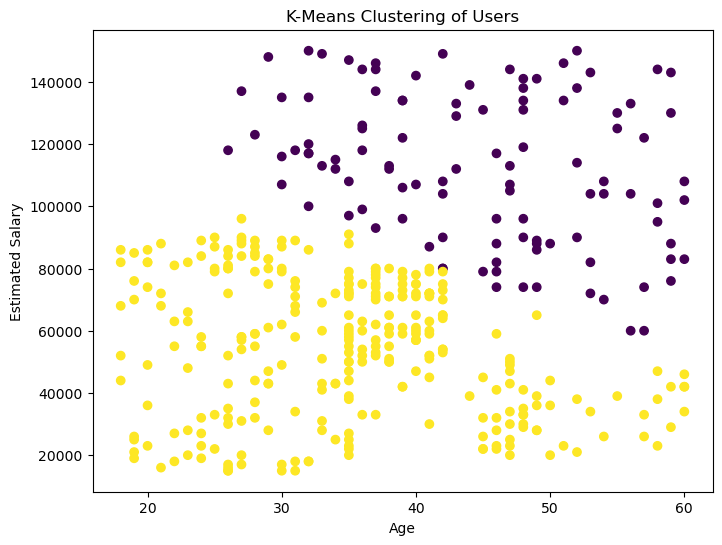

Cluster Centers:
[[ 0.66793746  1.24496388]
 [-0.24704536 -0.46046609]]


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\K-Means & Hirarchical Clustering\Social_Network_Ads.csv")

# Step 2: Data Preprocessing
# Label Encoding for 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male -> 1, Female -> 0

# Select features for clustering (e.g., 'Age' and 'EstimatedSalary')
X = df[['Age', 'EstimatedSalary']]

# Step 3: Feature Scaling (optional but recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
# Choose the number of clusters (k), let's try with 2 clusters for this example
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: Add the cluster labels to the dataset
df['Cluster'] = y_kmeans

# Step 6: Visualization of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('K-Means Clustering of Users')
plt.show()

# Optionally: Evaluate the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

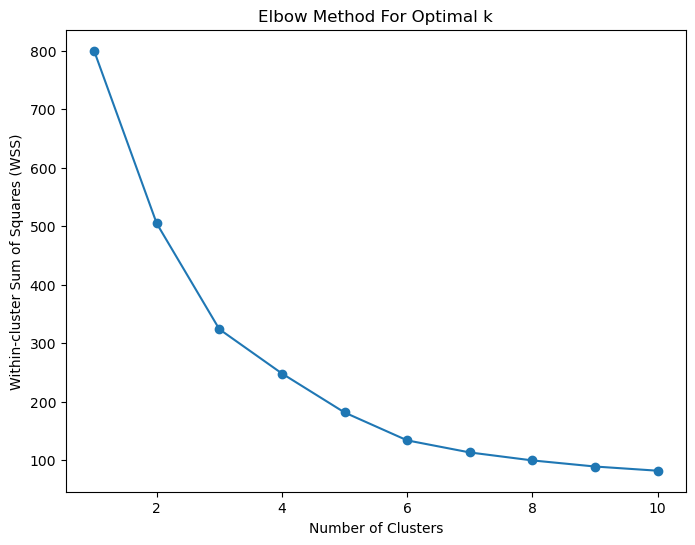

In [2]:
# Elbow Method to find optimal k
wss = []
for i in range(1, 11):  # Try different values of k (1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.show()
